El código de este parcialito se encuentra en el siguiente repositorio: [https://github.com/lucashemmingsen/75.30tp2](https://github.com/lucashemmingsen/75.30tp2)

1.  
    a. Obtener una visualización de las comunidades presentes en dicha red (indicando el algoritmo utilizado).
    b. Considerando lo que respondiste en el parcialito 1 (ejercicio 2):
        i. Si mencionaste que había homofilia, ¿corresponde por el mismo tipo que mencionaste anteriormente? ¿por
qué?
        ii. Si mencionaste que no había homofilia (o bien no realizaste el ejercicio), ¿qué tipo de homofilia se puede ver
presente?
    c. Obtener los nodos correspondientes a una de las subredes (con al menos 20% de los nodos), y realizar una
visualización de las sub-comunidades presentes.


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
def load_graph(path):
    df = pd.read_csv(path)
    df = df.drop(columns='ConexionAeropuertos')
    g = nx.from_pandas_edgelist(df, 'Origen', 'Destino')
    return g

In [3]:
g = load_graph('World.csv')

In [21]:
louvain_communities = nx.algorithms.community.louvain_communities(g, seed=123)
print(louvain_communities)
print(f'Comunidades: {len(louvain_communities)}')
print(f'Es partición: {nx.algorithms.community.is_partition(g, louvain_communities)}')
print(f'Coverage: {nx.algorithms.community.quality.coverage(g, louvain_communities)}')
print(f'Performance: {nx.algorithms.community.quality.performance(g, louvain_communities)}')
print(f'Modularity: {nx.algorithms.community.modularity(g, louvain_communities)}')

[{'Senegal', 'Gibraltar', 'Congo (Brazzaville)', 'Nigeria', 'Burkina Faso', 'Malawi', 'Cape Verde', 'Chad', 'Mauritius', 'Cameroon', 'Mayotte', 'Gambia', "Cote d'Ivoire", 'Djibouti', 'Zimbabwe', 'Comoros', 'Tunisia', 'Liberia', 'Equatorial Guinea', 'Benin', 'Mali', 'Morocco', 'Yemen', 'Namibia', 'Mauritania', 'Eritrea', 'Angola', 'South Sudan', 'Western Sahara', 'France', 'Guinea', 'Niger', 'Somalia', 'Reunion', 'Lesotho', 'Congo (Kinshasa)', 'Togo', 'Kenya', 'Libya', 'South Africa', 'Gabon', 'Guinea-Bissau', 'Mozambique', 'Algeria', 'Botswana', 'Tanzania', 'Rwanda', 'Zambia', 'Swaziland', 'Madagascar', 'Sierra Leone', 'Burundi', 'Ethiopia', 'Ghana', 'Sao Tome and Principe', 'Uganda', 'Central African Republic', 'Sudan', 'Turkey', 'Seychelles'}, {'Montenegro', 'Luxembourg', 'Lithuania', 'Croatia', 'Serbia', 'Israel', 'Latvia', 'Lebanon', 'Albania', 'Switzerland', 'Estonia', 'Iraq', 'Jordan', 'Romania', 'Faroe Islands', 'Sweden', 'Italy', 'Finland', 'Russia', 'Georgia', 'Greece', 'Ukrai

In [5]:
def plot_communities(G, communities, title='',save=False,file_name='',n_clusters = None):
    labels = {node: node for node in G.nodes()}
    number_communities = len(communities)
        
    available_colors = {0:'#14f1f4', 1:'#f4ed14', 2:'#a914f4', 3:'#14f444', 4:'#f4148e'}
    colors = []
    for node in G.nodes():
        for i in range(len(communities)):
            if node in communities[i]:
                colors.append(available_colors[i])
                break
    pos = nx.kamada_kawai_layout(G)
    plt.figure(figsize=(20,20))
    plt.title(title)

    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color=colors, alpha=0.7, node_size=700, linewidths=2)
    nx.draw_networkx_edges(G, pos, width=0.3, alpha=0.5)
    nx.draw_networkx_labels(G, pos, labels=labels)
    
    if save:
        plt.savefig(file_name, format = 'svg', dpi=300)

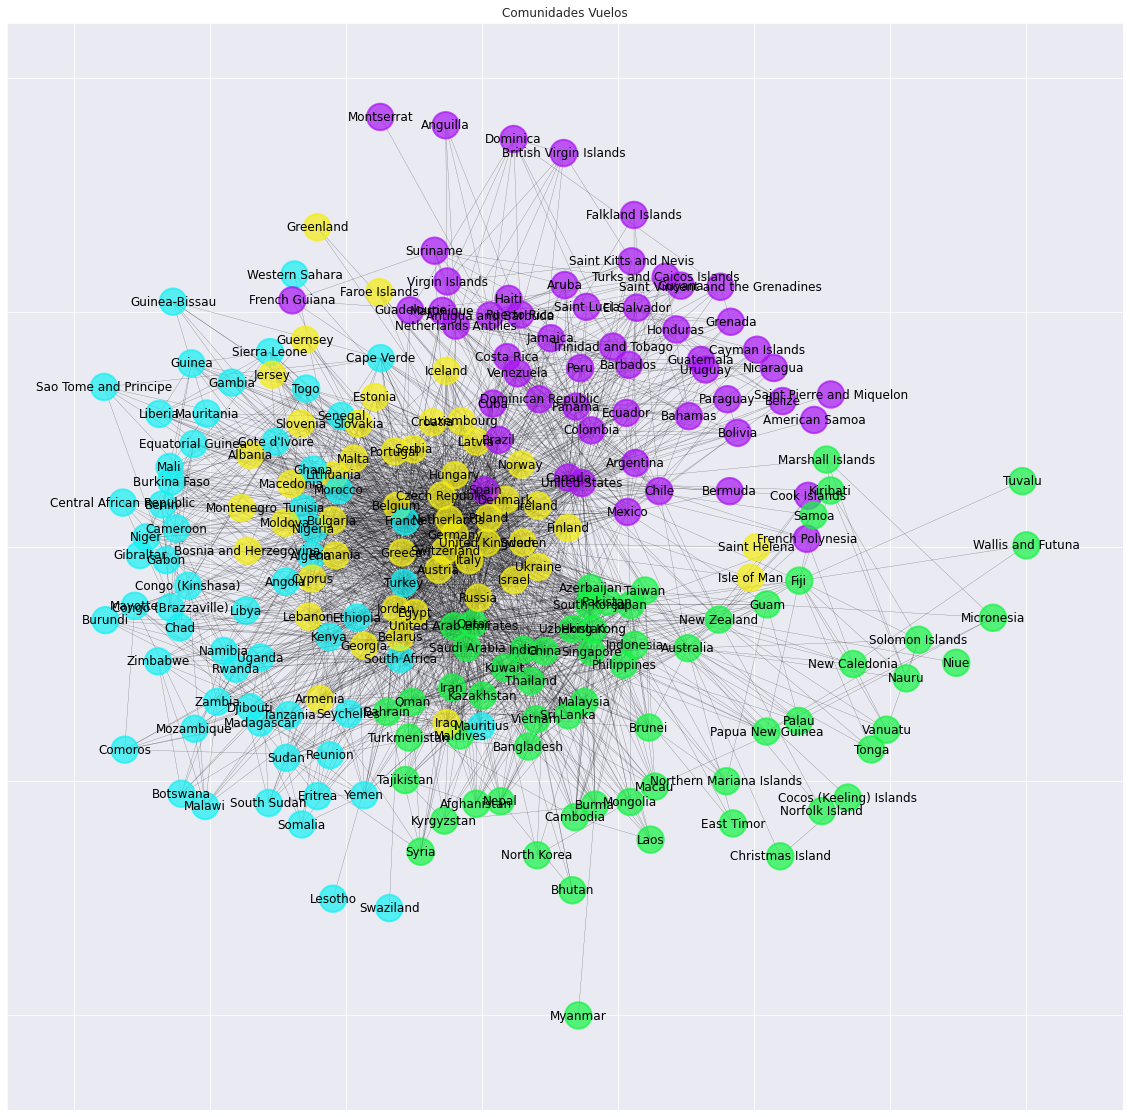

In [6]:
plot_communities(g, louvain_communities, title='Comunidades Vuelos')

Se utilizó el algoritmo de Louvain para detectar las comunidades presentes en la red de vuelos.
Este algoritmo nos arrojó como resultado un total de 4 comunidades.
Se puede observar claramente como estas 4 comunidades se corresponden con la homofilia mencionada en el anterior trabajo.
Se puede ver que hay homofilia por continente y como las comunidades detectadas se corresponden con ellos. Una de las comunidades contempla a América, otra a África, otra a Europa y la cuarta a Asia y Oceanía.
Se pueden contemplar algunos casos especiales, como por ejemplo el de España estando en la misma comunidad que América, o el de Francia compartiendo comunidad con África. Estos casos se pueden llegar a analizar desde los lazos culturales y coloniales que tiene España con América y Francia con África, y por lo tanto mayor cantidad de vuelos entre ellos.
Otro caso que puede analizarse es el de Rusia, que si bien la gran mayoría del país está en continente asiático, sus ciudades más importantes están cercanas a, ó en Europa, por lo tanto la mayor cantidad de conexiones son con  países del continente europeo.
A continuación puede verse un mapa con las comunidades detectadas por el algoritmo para nuestra red de vuelos.

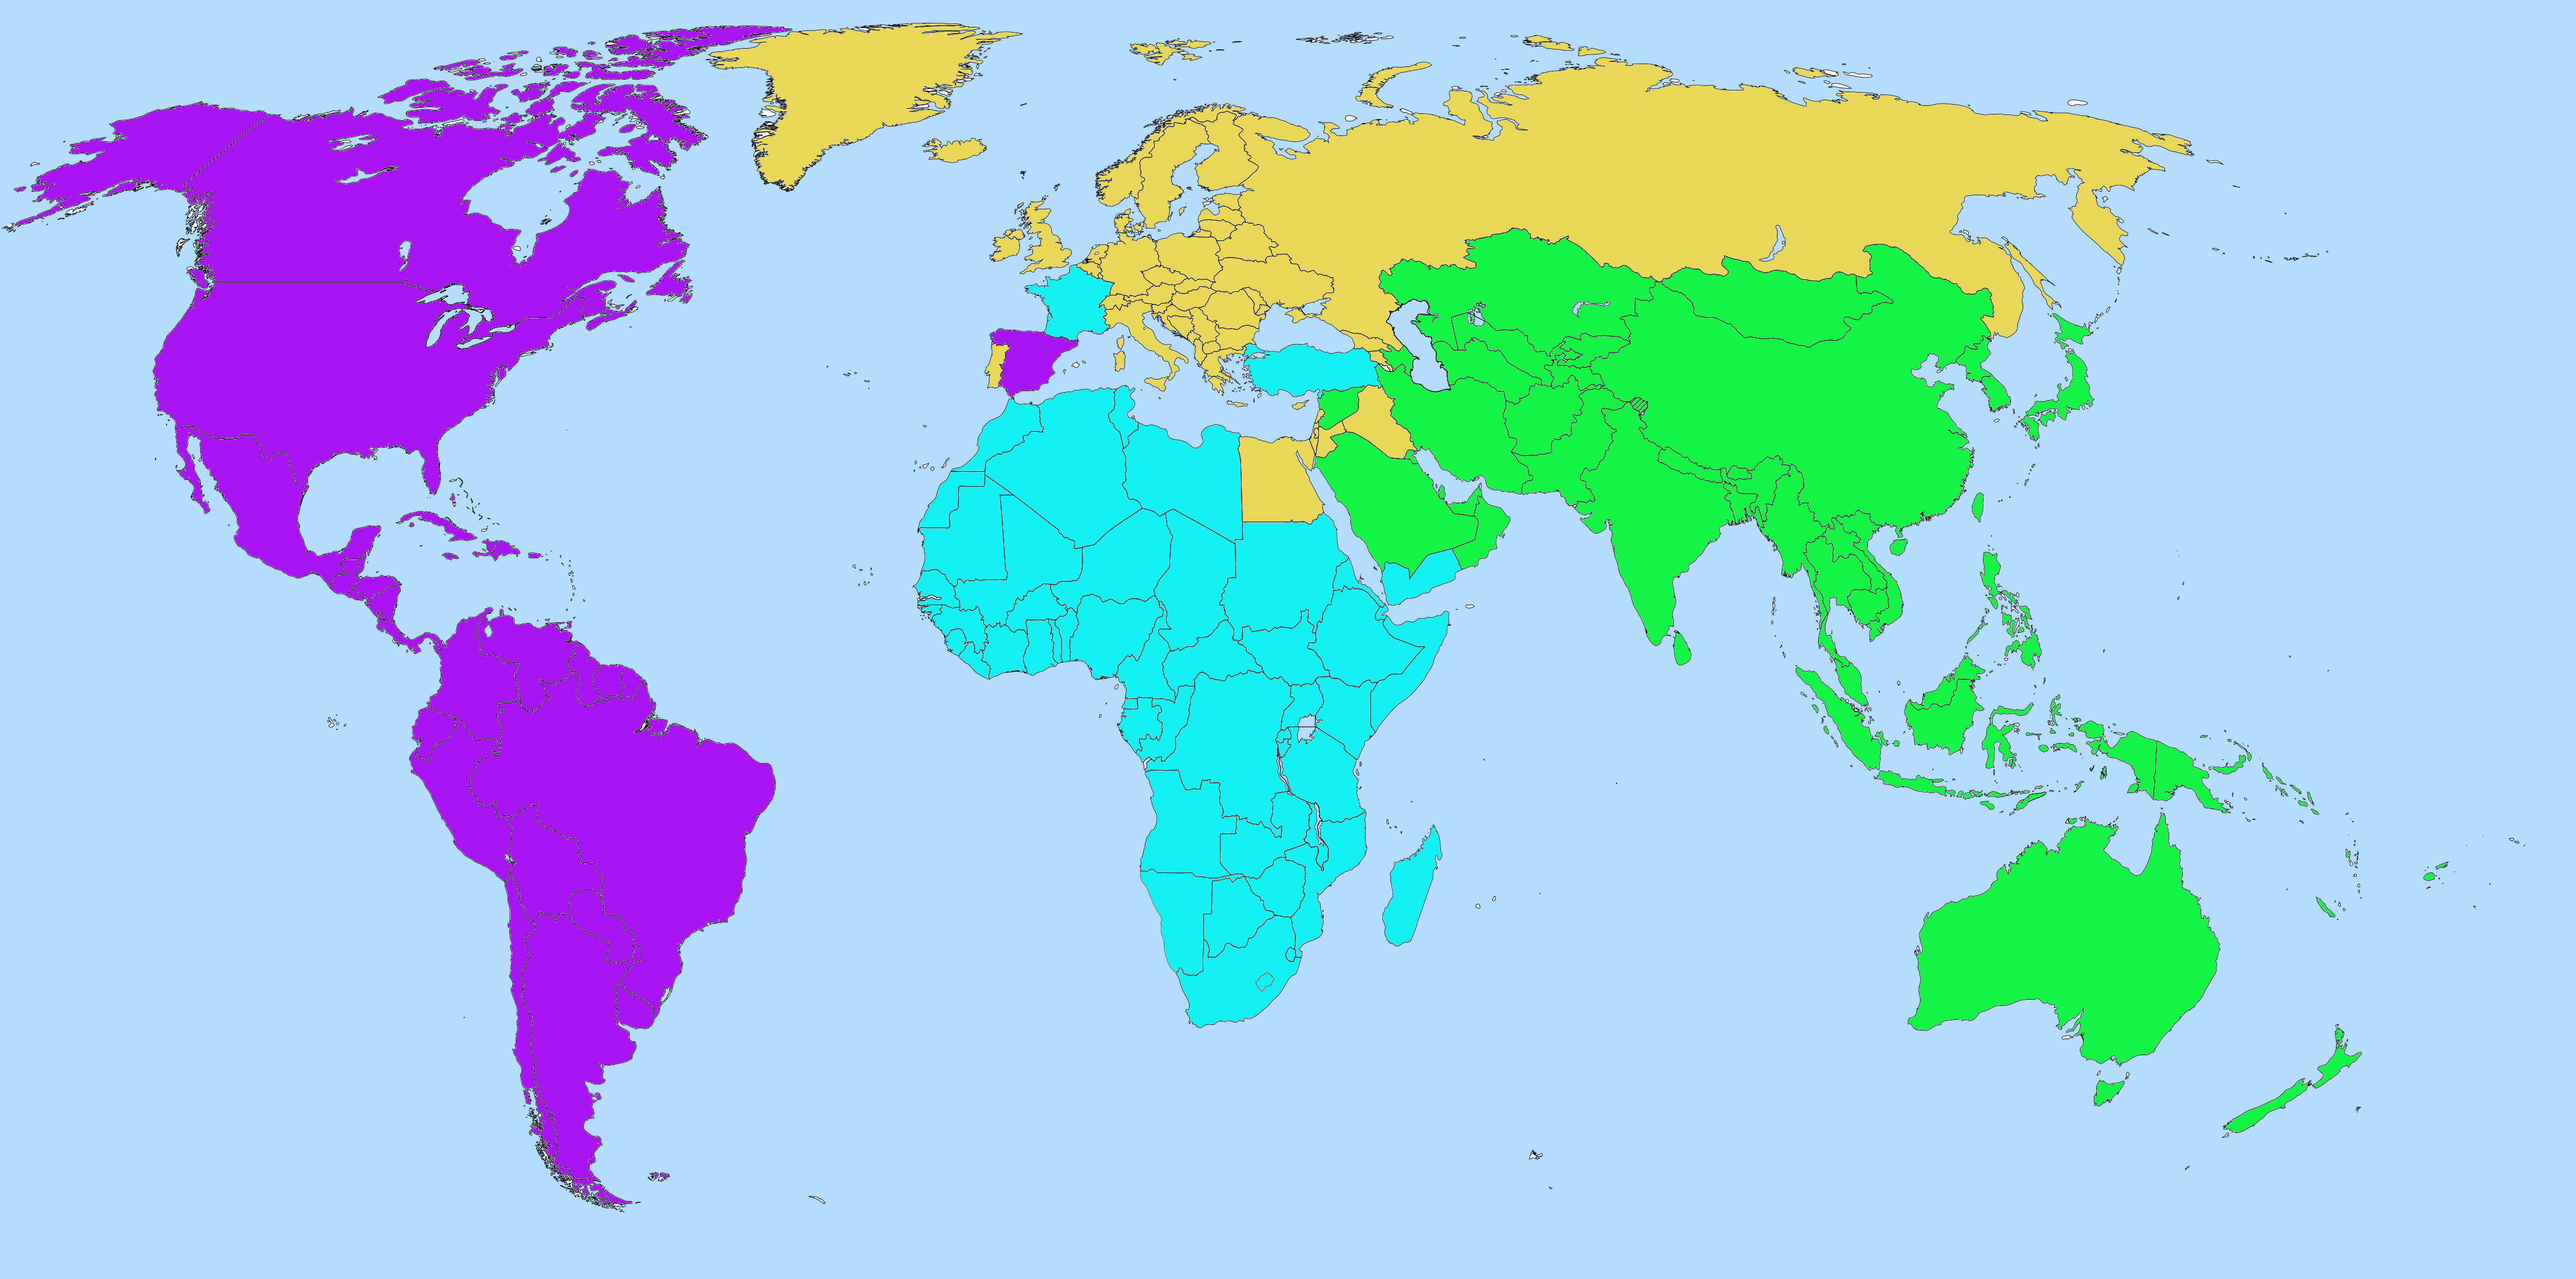

In [22]:
from IPython.display import Image
Image("img/mundo.png")

[{'China', 'Mongolia', 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan', 'Kazakhstan'}, {'Northern Mariana Islands', 'South Korea', 'Myanmar', 'Singapore', 'Malaysia', 'Cambodia', 'Taiwan', 'Philippines', 'Brunei', 'Laos', 'North Korea', 'Japan', 'East Timor', 'Indonesia', 'Hong Kong', 'Burma', 'Palau', 'Macau', 'Vietnam', 'Guam'}, {'Afghanistan', 'Kuwait', 'United Arab Emirates', 'Pakistan', 'Nepal', 'Saudi Arabia', 'Iran', 'Oman', 'Bahrain', 'India', 'Sri Lanka', 'Syria', 'Maldives', 'Qatar', 'Thailand', 'Turkmenistan', 'Bhutan', 'Azerbaijan', 'Bangladesh'}, {'Cocos (Keeling) Islands', 'Australia', 'Solomon Islands', 'New Caledonia', 'Papua New Guinea', 'New Zealand', 'Tuvalu', 'Norfolk Island', 'Micronesia', 'Fiji', 'Christmas Island', 'Nauru', 'Marshall Islands', 'Tonga', 'Wallis and Futuna', 'Kiribati', 'Niue', 'Vanuatu', 'Samoa'}]
Comunidades: 4
Es comunidad: True


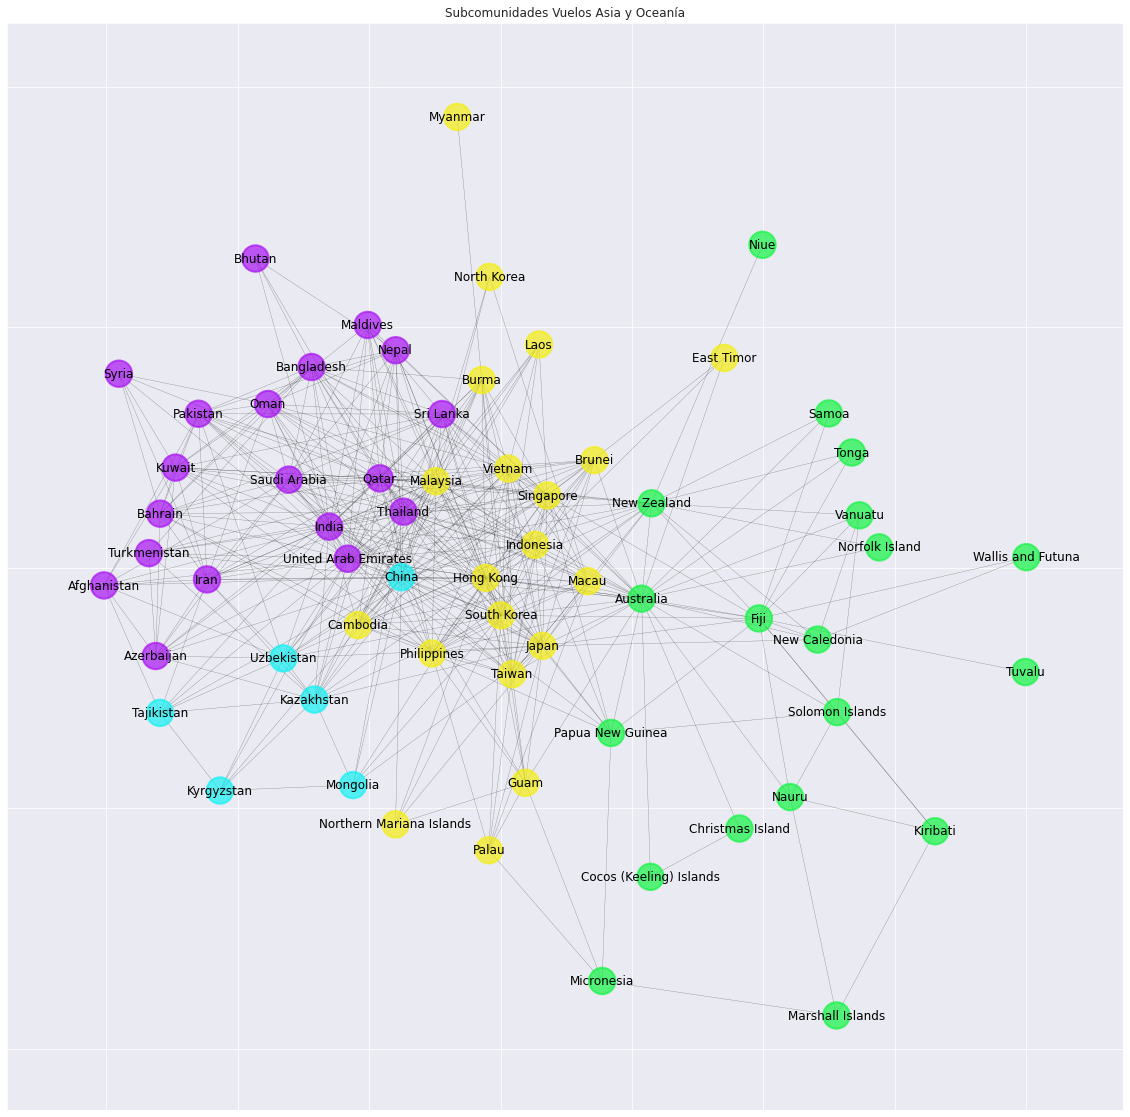

In [9]:
asia_oceania = g.subgraph(louvain_communities[3])
asia_oceania_communities = nx.algorithms.community.louvain_communities(asia_oceania, seed=123)
print(asia_oceania_communities)
print(f'Comunidades: {len(asia_oceania_communities)}')
print(f'Es comunidad: {nx.algorithms.community.is_partition(asia_oceania, asia_oceania_communities)}')
plot_communities(asia_oceania, asia_oceania_communities, title='Subcomunidades Vuelos Asia y Oceanía')

Se tomó del grafo de vuelos la subred correspondiente a la comunidad de Asia y Oceanía y se volvió a correr el algoritmo de Louvain sobre esta subred. El algoritmo nos volvió a dar como resultado 4 comunidades. Se puede notar en el mapa siguiente como estas 4 comunidades están agrupadas por zona geógráfica. Se puede decir entonces que tenemos homofilia por cercanía geográfica en este caso.

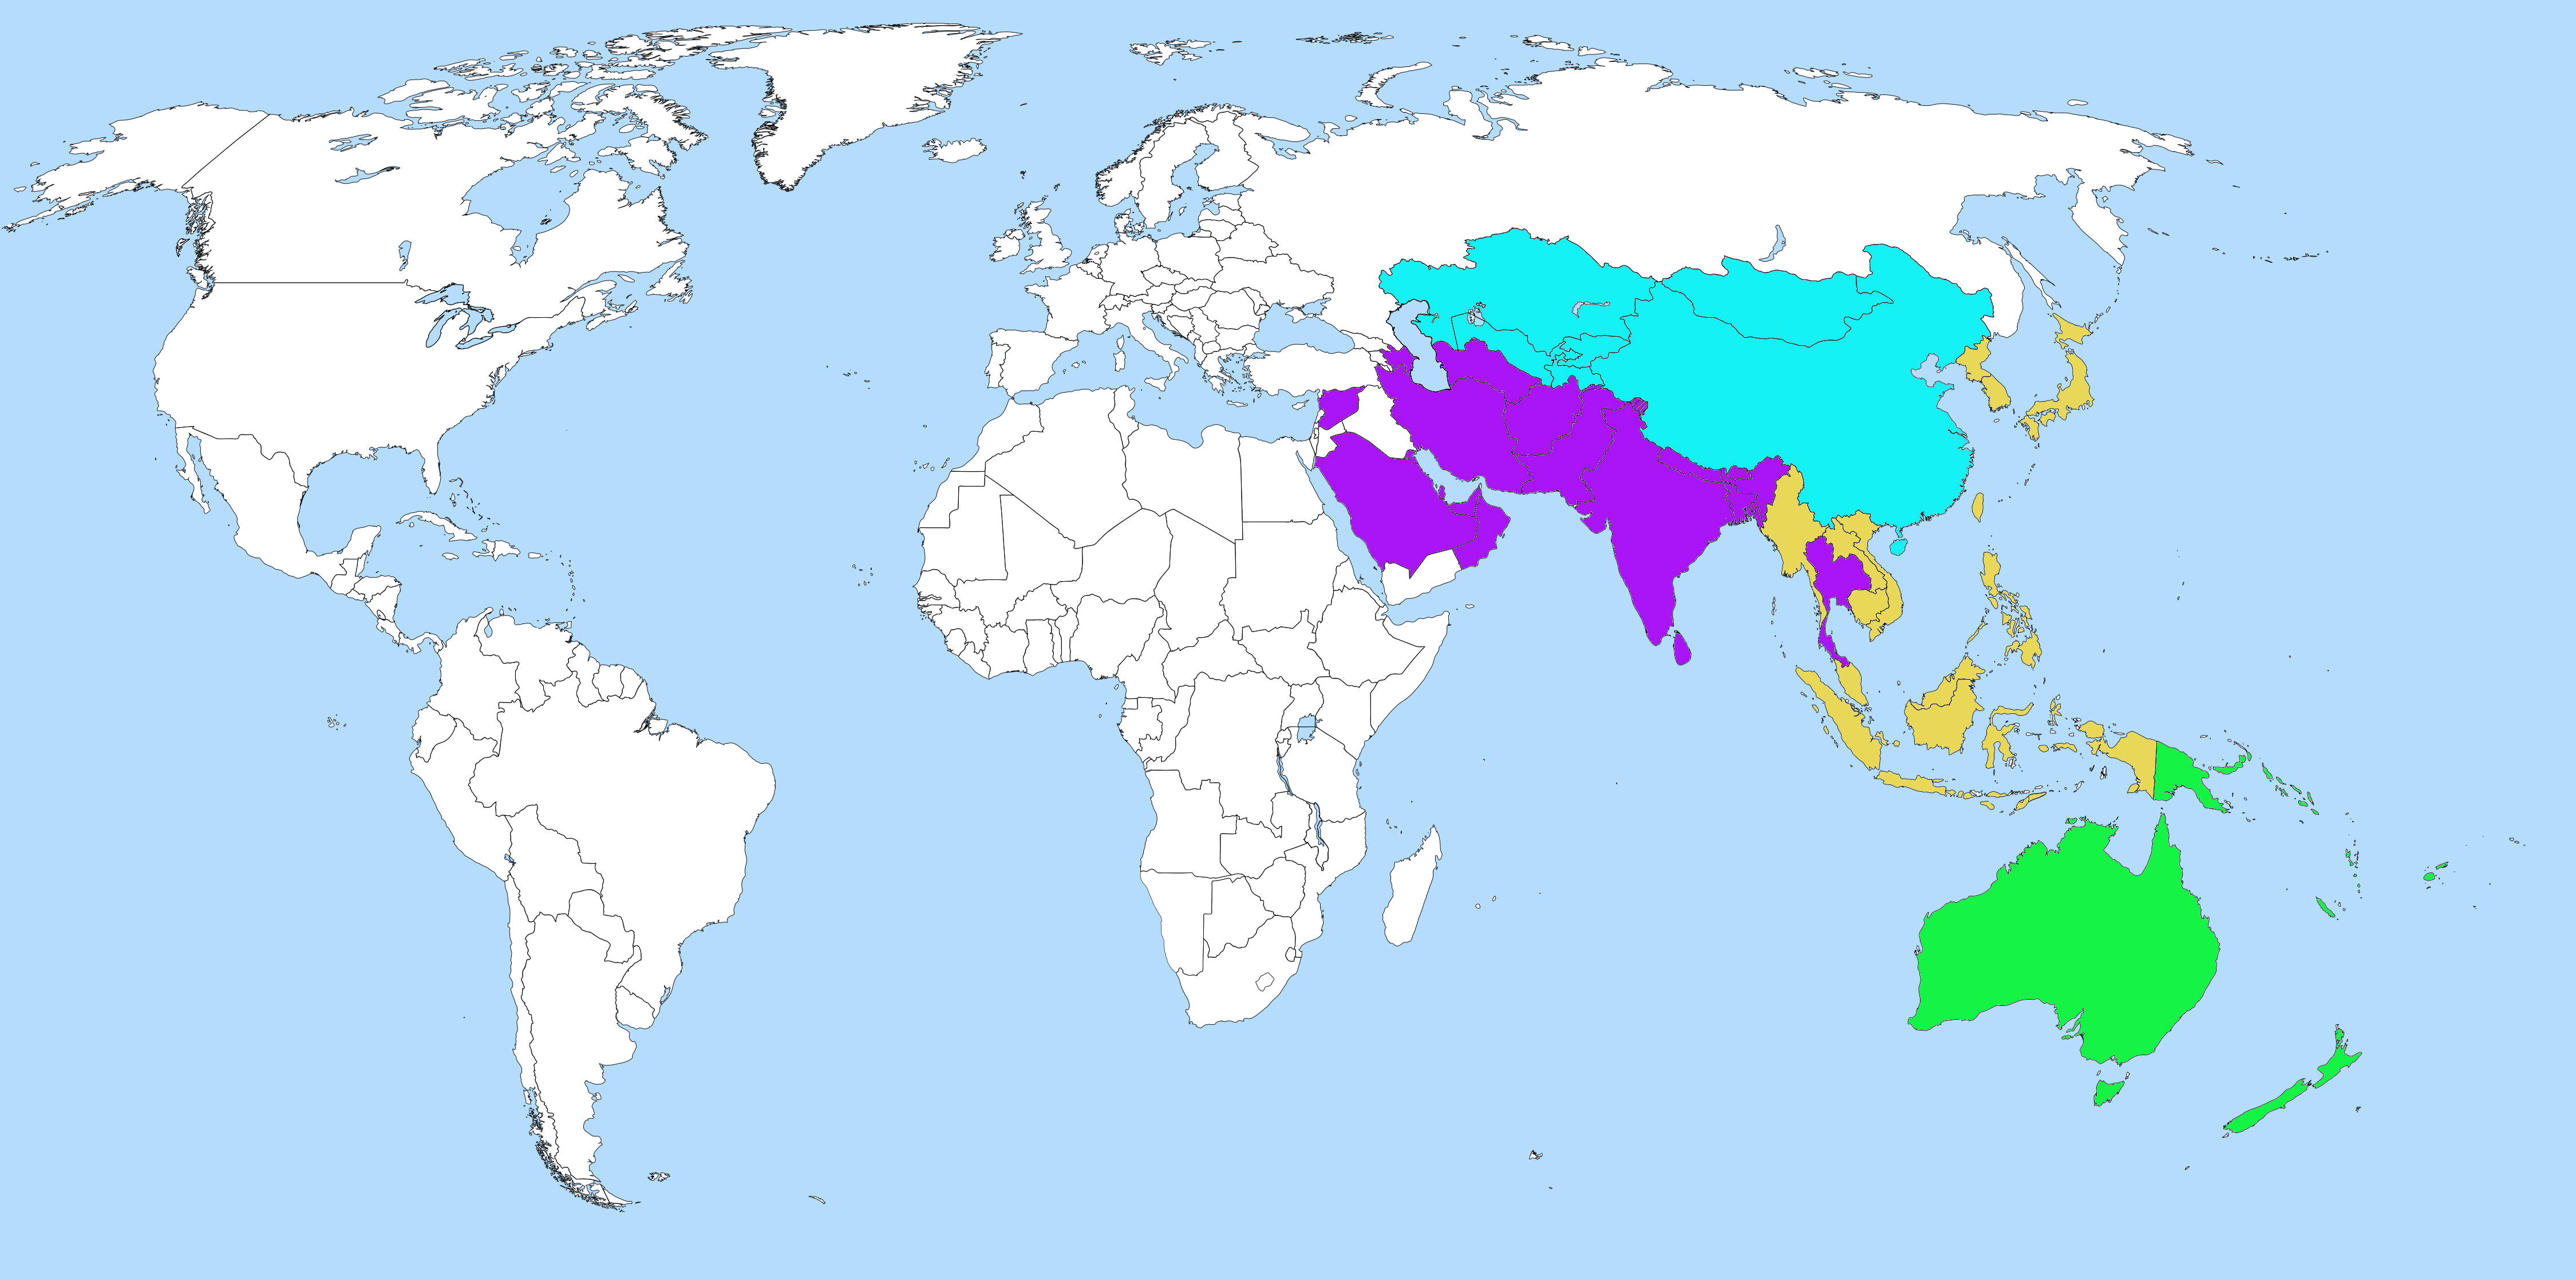

In [23]:
from IPython.display import Image
Image("img/asia.png")

2.
    a. Calcular los motifs de hasta 5 nodos de la subred definida en el punto 1.c.
    b. Calcular el promedio y desvío estandar de los motifs de una red de baseline. Calcular el significant profile de la
red, y hacer un gráfico.
    c. Intentar dar con una explicación del resultado obtenido en el punto anterior.

In [13]:
from motifs.calculos import calcular_motifs, significance_profile, motif_grafo_eleatorios
from metricas import distribucion_grados
from modelos import configuration_model
from motifs.graficos import graficar_significant_profile

In [14]:
MAX_NODOS_MOTIFS = 5
motifs = calcular_motifs(asia_oceania, MAX_NODOS_MOTIFS)
print(motifs)

[  5352   1780  26166  20745   1564  39349  16651   4762  69460 195139
  51151 158337 104781 167238   2694  25106 242165  33653 149624   1241
  23915  49526 161117 116822  11197 134510  10234  47666   9008]


In [15]:
dist = distribucion_grados(asia_oceania)
promedios, stds = motif_grafo_eleatorios(lambda: configuration_model(dist), MAX_NODOS_MOTIFS, iters=20)
SP = significance_profile(motifs, promedios, stds)
print("SP:", SP)

Iteracion 1
Iteracion 2; anterior: 387.34 segs
Iteracion 3; anterior: 361.51 segs
Iteracion 4; anterior: 388.46 segs
Iteracion 5; anterior: 383.01 segs
Iteracion 6; anterior: 405.02 segs
Iteracion 7; anterior: 405.36 segs
Iteracion 8; anterior: 387.42 segs
Iteracion 9; anterior: 380.58 segs
Iteracion 10; anterior: 390.13 segs
Iteracion 11; anterior: 337.34 segs
Iteracion 12; anterior: 357.40 segs
Iteracion 13; anterior: 368.59 segs
Iteracion 14; anterior: 302.20 segs
Iteracion 15; anterior: 368.58 segs
Iteracion 16; anterior: 355.49 segs
Iteracion 17; anterior: 345.35 segs
Iteracion 18; anterior: 383.05 segs
Iteracion 19; anterior: 390.08 segs
Iteracion 20; anterior: 384.49 segs
SP: [-0.00180018  0.10914492 -0.04743229 -0.01396164 -0.05514689  0.05483124
  0.0738793   0.23125533 -0.0523726  -0.04091214 -0.01009883  0.00614266
  0.03636044  0.02779693 -0.03827666 -0.0508496   0.03536699  0.12274106
  0.03726597 -0.03481049 -0.04028611  0.07216049  0.13760642  0.03660476
 -0.02959605  0.

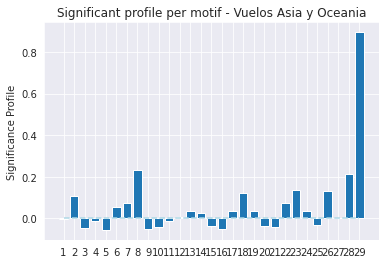

In [17]:
graficar_significant_profile(SP, 'Vuelos Asia y Oceania')

El gŕafico muestra cuales de todos los motifs de 5 nodos no dirigidos están subrepresentados y sobrerepresentados en la red de vuelos.Se puede ver que la gran myoría de los motifs se encuentran alrededor del promedio salvo algunas excepciones (2, 8, 18, 23, 26 y 28). El motif 29 es el único caso que está muy sobrerepresentado.

3. Detectar los roles en dicha red utilizando el algoritmo RolX, explicando el resultado obtenido.

In [ ]:
from graphrole import RecursiveFeatureExtractor, RoleExtractor

In [ ]:
def extract_roles_and_plot(G, title='',save = False ,file_name='', big=False):
    feature_extractor = RecursiveFeatureExtractor(G)
    features = feature_extractor.extract_features()
    role_extractor = RoleExtractor(n_roles=None)
    role_extractor.extract_role_factors(features)
    labels = {node: node for node in G.nodes()}

    available_colors = {'role_0':'#E9D758', 'role_1':'#297373', 'role_2':'#ff8552', 'role_3':'#888888', 'role_4':'#00aa00','role_5':'#aaaa00','role_6':'#aa0000' , 'role_7':'#0000aa'}
    
    colors = [available_colors[role_extractor.roles[node]] for node in G.nodes()]
    
    pos = nx.kamada_kawai_layout(G)
    if big:
        plt.figure(figsize=(25,25))
    else:
        plt.figure(figsize=(10,10))
    plt.title(title)

    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color=colors, alpha=0.7, node_size=400, linewidths=2)
    nx.draw_networkx_edges(G, pos, width=0.3, alpha=0.5)
    nx.draw_networkx_labels(G, pos, labels=labels)
    
    if save:
        plt.savefig(file_name, format = 'svg', dpi=300)

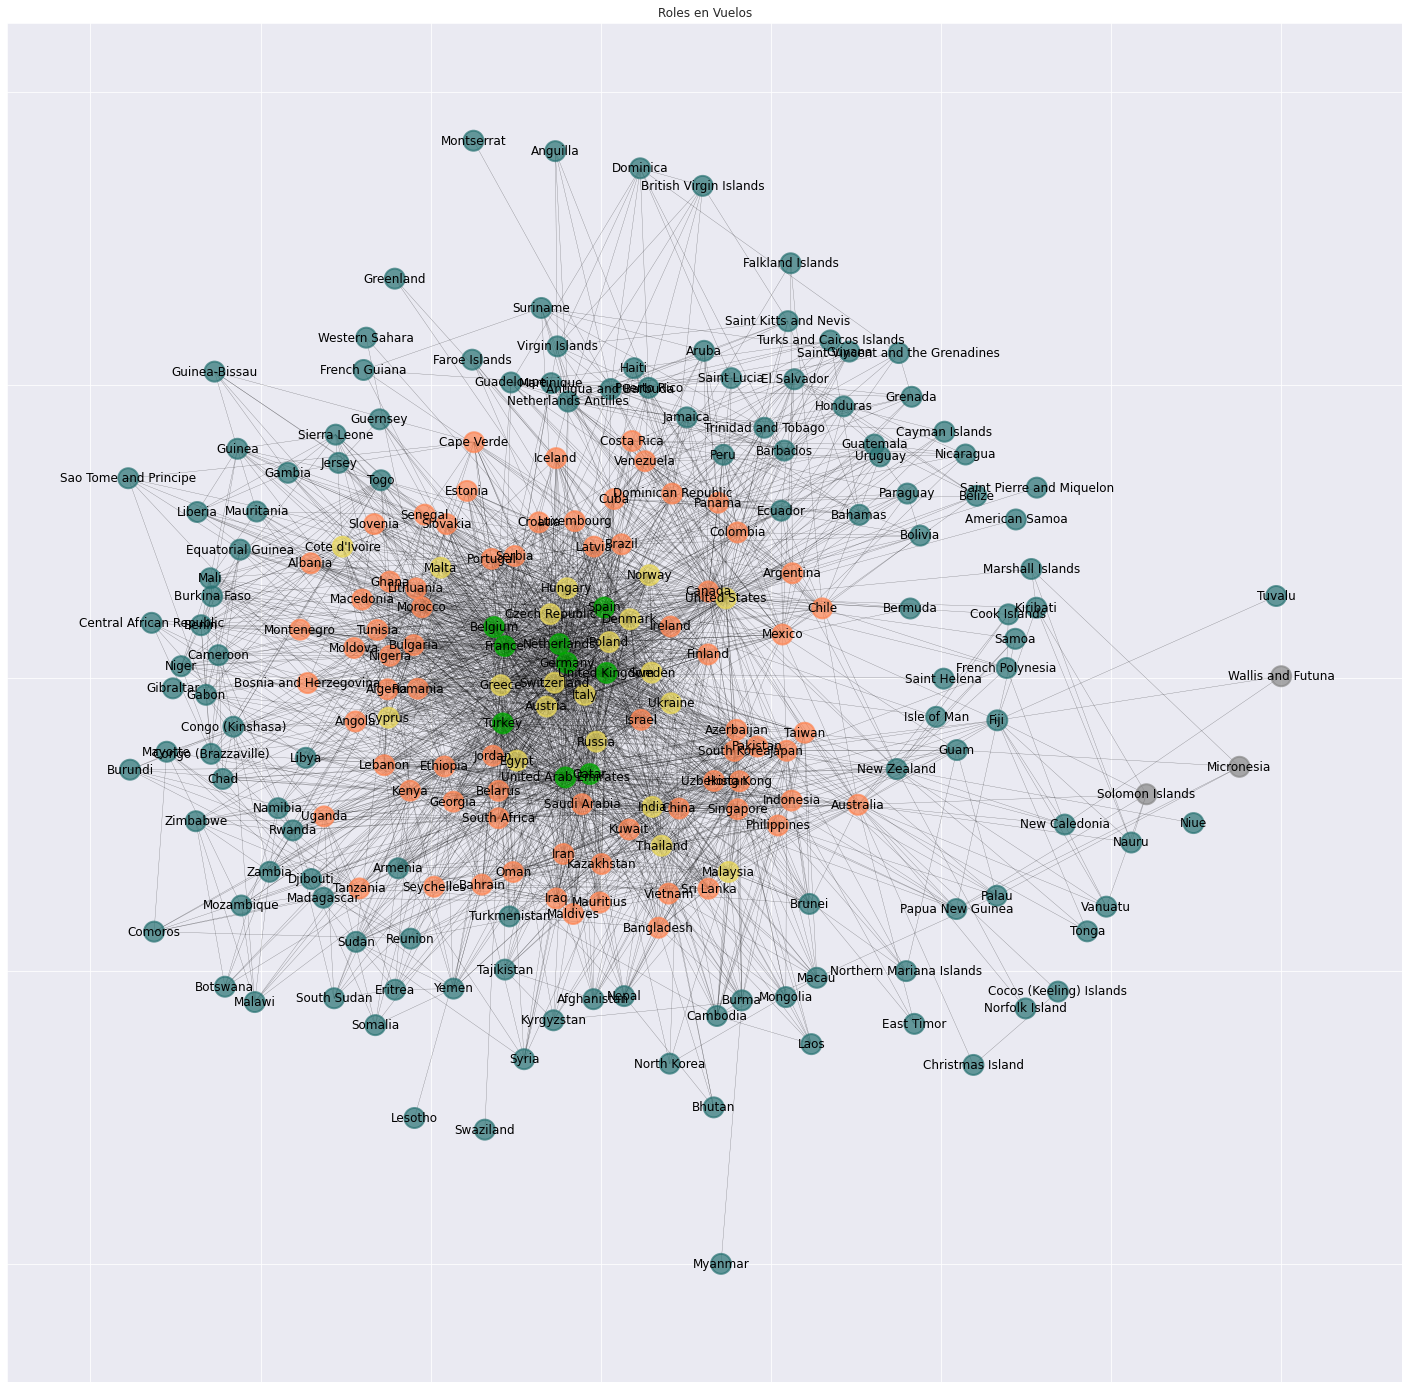

In [ ]:
extract_roles_and_plot(g,title='Roles en Vuelos', save=False, file_name='img/roles_vuelos.svg', big=True)

Se ejecutó el algoritmo RolX sobre la red de vuelos mundiales. El algoritmo identificó 5 roles, siendo los nodos coloreados en verdes los nodos centrales de la red, es decir, los paises que tienen mayor importancia dentro de nuestra red de vuelos. Le siguen los nodos amarillos, naranjas hasta llegar a los nodos periféricos de la red en verde oscuro(?) y gris.